In [5]:
import tensorflow as tf
from tensorflow.keras import layers 
from tensorflow.keras.regularizers import l2
from sklearn import datasets
import sklearn
import pandas as pd
import numpy as np
print(tf.__version__)

2.5.0


## Load Data
First get the data.  Sklearn presents the data in a dictionary.  

The target is the price is thousands

Note that X is a dataframe while y is an array!!

In [6]:
cal=datasets.fetch_california_housing()

In [7]:
x = pd.DataFrame(cal['data'])

In [8]:
x.columns=cal['feature_names']

In [9]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [10]:
y = cal['target']

In [11]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

## Scale Data

Neural Networks are especially sensitive do data scaling.  Nearly all the activation functions saturate at (0,1) or (-1,1)

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(x)

# Print out the adjustment that the scaler applied to the total_earnings column of data
print("Note: median values were scaled by multiplying by {:.10f} and adding {:.6f}".format(scaler.scale_[7], scaler.min_[7]))
multiplied_by = scaler.scale_[7]
added = scaler.min_[7]

scaled_train_df = pd.DataFrame(scaled_train, columns=x.columns.values)

Note: median values were scaled by multiplying by 0.0996015936 and adding 12.385458


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

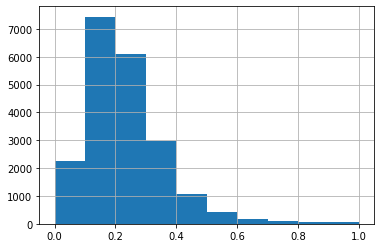

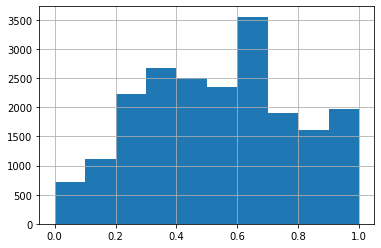

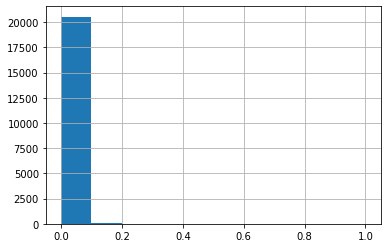

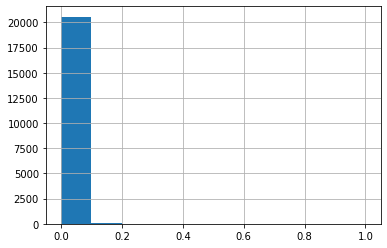

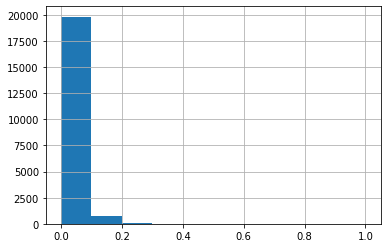

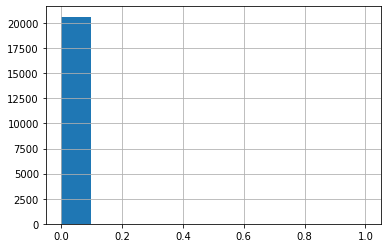

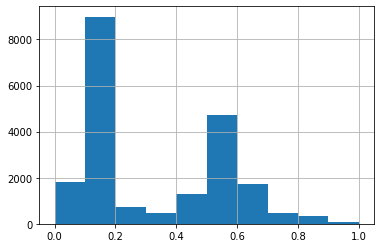

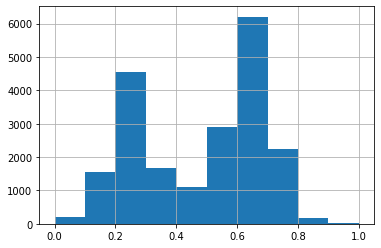

In [14]:
for i in scaled_train_df:
    scaled_train_df[i].hist()
    plt.show()

Nueral Networks generally are one of the slowest methods, thus a full CV is not always feasable.  FOr this example, it is not nessecary, but will be done for practice.  Large samples generally have 2 splits: training and validation.  Using this nominclature, validation is your "test" set there is NEVER used to build a model

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_train_df, y, test_size=0.20, random_state=1776)

## Model 
Alright lets get down to business.  We will use the Sequential() class to build a model.  This means we just add layer after layer to the model (in order).

Note that this is NOT the keras package proper.  This is an implementation of the Keras API in tensorflow.  THey are closely related, but this IS Tensorflow (package), not Keras (package)

In [16]:
x_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
12289,0.099812,0.764706,0.029635,0.022708,0.038902,0.001914,0.147715,0.734064
7858,0.167536,0.627451,0.022830,0.023169,0.049637,0.001468,0.143464,0.618526
11190,0.126536,0.549020,0.019849,0.021207,0.029541,0.001624,0.136026,0.638446
12759,0.123067,0.509804,0.023099,0.021900,0.065333,0.000797,0.646121,0.294821
10433,0.155488,0.450980,0.019035,0.021136,0.023739,0.001307,0.094580,0.670319
...,...,...,...,...,...,...,...,...
4735,0.362133,0.901961,0.030951,0.020049,0.020208,0.001316,0.160468,0.593625
14266,0.109661,0.647059,0.020855,0.019076,0.035539,0.002830,0.015940,0.721116
9635,0.104943,0.313725,0.026483,0.022922,0.015611,0.001290,0.483528,0.331673
10988,0.331023,0.568627,0.041117,0.020536,0.043079,0.001751,0.127524,0.652390


Sequential allows use to build a network layer by layer.  It automatically assumes that any layer you add is connected to the previous layer.  Notice we do not specify the input size.  Until we run the .fit() method, the full "graph" or set of matrix operations is not built.  

Once we have fit the model, we can call the .summary() method to get details about our model.

In [17]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(8,)))
model.add(layers.Dense(100,activation='sigmoid'))  # adds a layer with 100 neurons, tanh activation
model.add(layers.Dense(503, activation='sigmoid'))   # adds a layer with 50 neurons, tanh activation
model.add(layers.Dense(1, activation='linear'))  # adds a layer with 1 neurons, linear (aka NO) activation



## Compile Model

The compile step adds an optimizer (solver) and your loss metrics.

In [18]:
model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['mean_squared_error','mean_absolute_error'])

## Fit model
Now it is time to train

In [19]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test), batch_size=32)

Epoch 1/10
516/516 [==============================] - 3s 3ms/step - loss: 3.7633 - mean_squared_error: 3.7633 - mean_absolute_error: 1.0912 - val_loss: 1.2989 - val_mean_squared_error: 1.2989 - val_mean_absolute_error: 0.8989
Epoch 2/10
516/516 [==============================] - 1s 3ms/step - loss: 1.3889 - mean_squared_error: 1.3889 - mean_absolute_error: 0.9323 - val_loss: 1.3325 - val_mean_squared_error: 1.3325 - val_mean_absolute_error: 0.9405
Epoch 3/10
516/516 [==============================] - 1s 3ms/step - loss: 1.3812 - mean_squared_error: 1.3812 - mean_absolute_error: 0.9296 - val_loss: 1.2878 - val_mean_squared_error: 1.2878 - val_mean_absolute_error: 0.8928
Epoch 4/10
516/516 [==============================] - 1s 3ms/step - loss: 1.3711 - mean_squared_error: 1.3711 - mean_absolute_error: 0.9251 - val_loss: 1.3157 - val_mean_squared_error: 1.3157 - val_mean_absolute_error: 0.8625
Epoch 5/10
516/516 [==============================] - 1s 3ms/step - loss: 1.3581 - mean_squared_

Now look at the history of the model--your train/test (aka validation) curves

In [20]:
model.summary()
somthing = model.weights

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               900       
_________________________________________________________________
dense_1 (Dense)              (None, 503)               50803     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 504       
Total params: 52,207
Trainable params: 52,207
Non-trainable params: 0
_________________________________________________________________


In [21]:
w = somthing[0].numpy()

In [22]:
x = np.array(x_train.loc[0,:])

In [23]:
somthing[1].shape  # w * x -> 8x100   * 8 x 1  x^T * w   1x8  8x100   1x100  +  1x100

TensorShape([100])

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

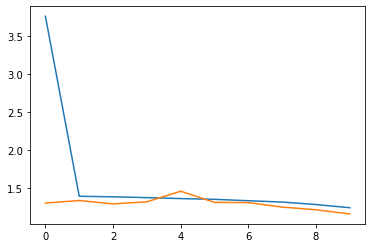

In [25]:
train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
plt.plot(train_loss)
plt.plot(val_loss)
plt.show()

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               900       
_________________________________________________________________
dense_1 (Dense)              (None, 503)               50803     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 504       
Total params: 52,207
Trainable params: 52,207
Non-trainable params: 0
_________________________________________________________________


## Visualize that data
Tensorboard allows you to look at your training curves in real time.  All we need to do here is add a "callback" that is executed every epoch end.  Tensorboard writes a summary of the model output.  If you manually build a neural network, you need to add tf.summary operations.

To run tensorboard type

`tensorboard --logdir logs`

Then go to localhost:6006 in your web browser 

or use the "magic" commands in jupyter below

In [27]:
from time import time
from tensorflow.keras.callbacks import TensorBoard
tb = TensorBoard(log_dir=f"logs\\{time()}")
%load_ext tensorboard
%tensorboard --logdir logs

In [28]:
model.compile(optimizer='rmsprop',
              loss='mean_squared_error',
              metrics=['mean_squared_error'])

In [29]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test), batch_size=10, callbacks=[tb])

Epoch 1/10
1652/1652 [==============================] - 9s 5ms/step - loss: 0.8801 - mean_squared_error: 0.8801 - val_loss: 0.9644 - val_mean_squared_error: 0.9644
Epoch 2/10
1652/1652 [==============================] - 7s 4ms/step - loss: 0.6607 - mean_squared_error: 0.6607 - val_loss: 0.8863 - val_mean_squared_error: 0.8863TA: 4s - loss: 0.6610 - mean_squared_error: 0. - ETA: 4s - loss: 0.6639 - mean - ETA: 3s - loss: 0.6602 - me - ETA: 3s - loss: 0.6626 - mean_squared_error:  - E - ETA: 0s - loss: 0.6616 - mean_squar
Epoch 3/10
1652/1652 [==============================] - 7s 4ms/step - loss: 0.6258 - mean_squared_error: 0.6258 - val_loss: 0.7924 - val_mean_squared_error: 0.7924
Epoch 4/10
1652/1652 [==============================] - 7s 4ms/step - loss: 0.5979 - mean_squared_error: 0.5979 - val_loss: 1.3761 - val_mean_squared_error: 1.3761 loss: 0.5973 - me
Epoch 5/10
1652/1652 [==============================] - 7s 4ms/step - loss: 0.5843 - mean_squared_error: 0.5843 - val_loss: 0.53

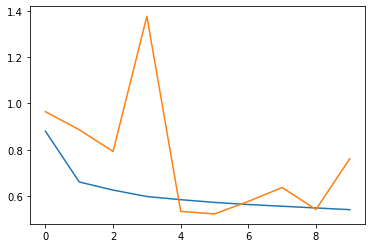

In [30]:
train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
plt.plot(train_loss)
plt.plot(val_loss)
plt.show()

## Classification?
The only thing we really need to change is the final layer to predict classes

In [31]:
model_iris = tf.keras.Sequential()

model_iris.add(layers.Dense(100, activation='tanh',kernel_initializer='zeros'))
model_iris.add(layers.Dense(3 ,activation='sigmoid'),)

model_iris.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [32]:
iris = datasets.load_iris()

In [33]:
x= iris['data']
y = iris['target']
# Why do I not have to scale?
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1776)

In [34]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [38]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(patience=2)
model_iris.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=100, batch_size=4, callbacks=[es])

Epoch 1/100
30/30 [==============================] - 0s 5ms/step - loss: 99.5508 - accuracy: 0.3333 - val_loss: 88.0896 - val_accuracy: 0.3333
Epoch 2/100
30/30 [==============================] - 0s 4ms/step - loss: 79.4715 - accuracy: 0.3333 - val_loss: 68.0388 - val_accuracy: 0.3333
Epoch 3/100
30/30 [==============================] - 0s 4ms/step - loss: 59.3998 - accuracy: 0.3333 - val_loss: 47.9861 - val_accuracy: 0.3333
Epoch 4/100
30/30 [==============================] - 0s 4ms/step - loss: 39.3066 - accuracy: 0.3333 - val_loss: 27.9374 - val_accuracy: 0.3333
Epoch 5/100
30/30 [==============================] - 0s 4ms/step - loss: 19.2453 - accuracy: 0.3333 - val_loss: 7.9307 - val_accuracy: 0.3333
Epoch 6/100
30/30 [==============================] - 0s 4ms/step - loss: 4.9122 - accuracy: 0.6083 - val_loss: 1.7306 - val_accuracy: 0.7000
Epoch 7/100
30/30 [==============================] - 0s 4ms/step - loss: 0.8293 - accuracy: 0.6417 - val_loss: 0.4655 - val_accuracy: 0.7000
Epoc

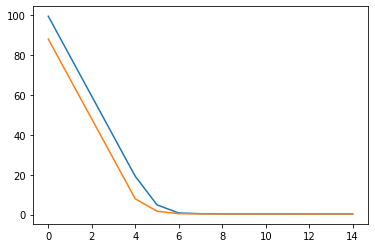

In [39]:
train_loss = model_iris.history.history['loss']
val_loss = model_iris.history.history['val_loss']
plt.plot(train_loss)
plt.plot(val_loss)
plt.show()

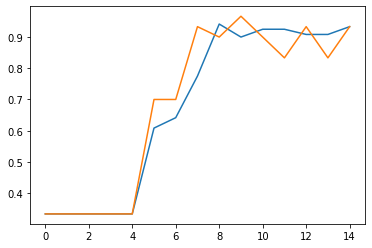

In [40]:
train_acc = model_iris.history.history['accuracy']
val_acc = model_iris.history.history['val_accuracy']
plt.plot(train_acc)
plt.plot(val_acc)
plt.show()

#### But WAIT!! There's more
Tensorflow has a ton of options to build a model.  The other useful way is called "model"  It allows a bit more fine grained control.  Notice how I created a "skip layer" that takes the output of layer1 and layer2, combines them and sends them to the output.  This is traditionally used more in Advanced Neural Networks with Convolutional or Recurrent architectures.  This is just a toy example.

In [41]:
model_new = tf.keras.Model()
inputs = tf.keras.Input(shape=(4,))  #notice i have to tell the input shape. I got away with NOT doing that in sequential
x = tf.keras.layers.Dense(4, activation=tf.nn.relu)(inputs)
layer1 = tf.keras.layers.Dense(10, activation=tf.nn.relu)(x)
layer2 = tf.keras.layers.Dense(10, activation=tf.nn.relu)(layer1)
joined = tf.keras.layers.Concatenate(axis=1)([layer1,layer2])
outputs = tf.keras.layers.Dense(3, activation=tf.nn.softmax)(joined)
model_new = tf.keras.Model(inputs=inputs, outputs=outputs)
model_new.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model_new.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=100, batch_size=4)

Epoch 1/100
30/30 [==============================] - 1s 9ms/step - loss: 1.4133 - accuracy: 0.3333 - val_loss: 1.1627 - val_accuracy: 0.3333
Epoch 2/100
30/30 [==============================] - 0s 5ms/step - loss: 1.0371 - accuracy: 0.3333 - val_loss: 0.9563 - val_accuracy: 0.3667
Epoch 3/100
30/30 [==============================] - 0s 5ms/step - loss: 0.9005 - accuracy: 0.6167 - val_loss: 0.8407 - val_accuracy: 0.8667
Epoch 4/100
30/30 [==============================] - 0s 5ms/step - loss: 0.8068 - accuracy: 0.7917 - val_loss: 0.7539 - val_accuracy: 0.7333
Epoch 5/100
30/30 [==============================] - 0s 5ms/step - loss: 0.7278 - accuracy: 0.7167 - val_loss: 0.6695 - val_accuracy: 0.7000
Epoch 6/100
30/30 [==============================] - 0s 5ms/step - loss: 0.6557 - accuracy: 0.7667 - val_loss: 0.5988 - val_accuracy: 0.7333
Epoch 7/100
30/30 [==============================] - 0s 5ms/step - loss: 0.5969 - accuracy: 0.8000 - val_loss: 0.5470 - val_accuracy: 0.7333
Epoch 8/100
3

In [42]:
model_new.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 4)]          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 4)            20          input_2[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 10)           50          dense_5[0][0]                    
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 10)           110         dense_6[0][0]                    
____________________________________________________________________________________________

### Lets go Crazy.  

You can control EVERY part of the loop.  USually not nessecary, but be aware \


In [43]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 120
train_dataset = tf.data.Dataset.from_tensor_slices((iris['data'],iris['target']))
train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)

In [44]:
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

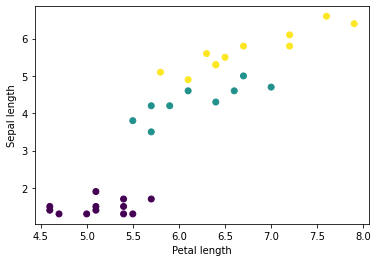

In [45]:
features, labels = next(iter(train_dataset))
plt.scatter(features[:,0],
            features[:,2],
            c=labels,
            cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show()

   

In [46]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),  # input shape required
  tf.keras.layers.Dense(10, activation=tf.nn.relu),
  tf.keras.layers.Dense(3)
])



In [47]:
predictions = model(features)
predictions[:5]

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[ 1.8738345 ,  1.7218388 , -0.1419865 ],
       [ 1.2177174 ,  1.2045068 ,  0.41946828],
       [ 2.302784  ,  2.113599  , -0.45279226],
       [ 1.4333742 ,  1.4242414 ,  0.5925067 ],
       [ 2.0031247 ,  1.8367372 , -0.20091091]], dtype=float32)>

In [48]:
tf.nn.softmax(predictions[:5])


<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[0.5019569 , 0.43117693, 0.06686618],
       [0.41034183, 0.4049566 , 0.18470158],
       [0.5287632 , 0.4376221 , 0.03361473],
       [0.41284016, 0.40908694, 0.1780729 ],
       [0.5109666 , 0.43264467, 0.0563887 ]], dtype=float32)>

In [49]:
print("Prediction: {}".format(tf.argmax(predictions, axis=1)))
print("    Labels: {}".format(labels))

Prediction: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
    Labels: [1 0 2 0 1 0 1 1 2 0 0 0 1 2 0 0 1 1 0 2 0 2 2 2 2 1 1 2 2 0 2 0]


In [50]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [51]:

def loss(model, x, y, training):
  # training=training is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  y_ = model(x, training=training)

  return loss_object(y_true=y, y_pred=y_)


l = loss(model, features, labels, training=False)
print("Loss test: {}".format(l))

Loss test: 1.7346655130386353


In [52]:

def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets, training=True)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [53]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [54]:
loss_value, grads = grad(model, features, labels)

print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(),
                                          loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.trainable_variables))

print("Step: {},         Loss: {}".format(optimizer.iterations.numpy(),
                                          loss(model, features, labels, training=True).numpy()))

Step: 0, Initial Loss: 1.7346655130386353
Step: 1,         Loss: 1.6080455780029297


In [56]:
## Note: Rerunning this cell uses the same model variables

# Keep results for plotting
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

  # Training loop - using batches of 32
  for x, y in train_dataset:
    # Optimize the model
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # Track progress
    epoch_loss_avg.update_state(loss_value)  # Add current batch loss
    # Compare predicted label to actual label
    # training=True is needed only if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    epoch_accuracy.update_state(y, model(x, training=True))

  # End epoch
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  if epoch % 50 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 1.453, Accuracy: 33.333%
Epoch 050: Loss: 0.420, Accuracy: 92.000%
Epoch 100: Loss: 0.206, Accuracy: 97.333%
Epoch 150: Loss: 0.135, Accuracy: 97.333%
Epoch 200: Loss: 0.094, Accuracy: 98.000%
